In [2]:
# -*- coding:utf-8 -*-

# 第二章 引言

## 读取来自bil.ly的1.usa.gov数据

In [3]:
path = 'example.txt'

In [4]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [5]:
# 使用内置或者第三方模块将JSON字符串转化为Python字典对象
import json
path = 'example.txt'
records = [json.loads(line) for line in open(path)] # 使用列表生成式遍历提取文件数据 转化为Python字典对象

In [6]:
records[0] # 索引从0开始 访问网址的第一个用户数据

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [7]:
# 以字符串形式给出想要访问的键
records[0]['tz'] # 用户地址

'America/New_York'

## 用纯Python代码对时区进行计数
### 假设想要知道该数据中最常出现的是哪个时区(地区)

In [8]:
# 提炼问题-解决问题
time_zones = [rec['tz'] for rec in records]

KeyError: 'tz'

#### 报错：不是所有记录中都包含键'tz'

In [ ]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [ ]:
time_zones[:10]

### 只看前十个时区 发现有些是未知的 虽然可以将其过滤掉 但现在暂时先留着 
### 接下来对时区进行计数 这里有两个方法
### 方法1：只是用python标准库
### 方法2：使用pandas

In [9]:
# 方法1 使用python标准库
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [10]:
# 假如非常了解 Python标准库 可以将代码写的更加简洁点
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # 所有的值均会初始化为0
    for x in sequence:
        counts[x] += 1
    return counts

In [11]:
counts = get_counts(time_zones)

NameError: name 'time_zones' is not defined

In [ ]:
counts['America/New_York']

In [12]:
path = 'example.txt'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [13]:
import json
records = [json.loads(line) for line in open(path)]

In [14]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [15]:
# 提出问题 用户地址大多位于哪里
time_zones = [rec['tz'] for rec in records]

KeyError: 'tz'

In [ ]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [ ]:
time_zones[:10]

In [ ]:
# 首先读取数据进行辨别
filename = 'example.txt'
open(filename).readline()

In [ ]:
# 使用json模块将其优化为字典格式 便于遍历数据进行查询
usagov_data = [json.loads(line) for line in open(filename)] 

#### json.loads( ) 是从txt文件中加载
#### json.load( ) 是从json文件中加载

In [ ]:
# 查看文件数据
usagov_data[0]

In [16]:
# 提出问题 解决问题 查看访问用户分布
user_distribution = [data['tz'] for data in usagov_data if 'tz' in data]

NameError: name 'usagov_data' is not defined

In [17]:
user_distribution[:10]

NameError: name 'user_distribution' is not defined

## 用Pandas对时区进行计数

In [18]:
# 使用pandas步骤还是差不多的
# 首先 使用json模块读取txt文件
import json
filename = 'example.txt'
records = [json.loads(line) for line in open(filename)]

In [19]:
# 其次 导入pandas模块中的数据框与系列 以便使用Dataframe Series
import pandas as pd
import numpy as np
data_usagov = pd.DataFrame(records)

In [20]:
data_usagov.head()

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...


In [21]:
data_usagov['tz'].head(10)

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [22]:
# 使用pd.DataFrame中的value_counts()方法 对'tz'列下的数据进行频次统计并且降序排列
data_usagov['tz'].value_counts().head(10)

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [23]:
# 再次 我们会想到使用matplotlib科学绘图库生成图片 进行可视化 但是数据中包含空值 需要进行遍历替换
# 空值有两种 第一种 既为空 使用fillna()进行充填 
# 第二种为空字符串 '' 利用pool值索引查找并替换
clean_data = data_usagov['tz'].fillna('Missing') # 第一种
clean_data.value_counts().head(10)

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [24]:
clean_data[clean_data == ''] = 'Unknown'
tz_counts = clean_data.value_counts()
tz_counts.head(10)

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

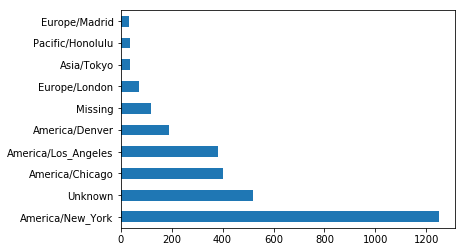

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
tz_counts[:10].plot(kind='barh', rot=0) # 导入绘图卡进行画图

### 还可以深化分析数据 例如数据'a'字段含有执行URL短缩操作的浏览器、设备、应用程序
### 深化分析 例如在New_York的用户 电脑系统是？喜欢用什么浏览器？等等

In [26]:
# 首先 查看'a'字段数据
data_usagov['a'].head()

0    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                               GoogleMaps/RochesterNY
2    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: a, dtype: object

In [27]:
data_usagov['a'][0] # 掌握Python内中的字符串函数和正则表达式 将字符串拆分出来

'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11'

In [28]:
data_usagov['a'][0].split()[0] # 拆分原理 split()方法按空格拆分字段

'Mozilla/5.0'

In [29]:
results = pd.Series([x.split()[0] for x in data_usagov.a.dropna()])
# data_usagov.a.dropna():数据data_usagov中字段'a'使用dropna()方法去除Nan值
# x.splits()[0] for x in data_usagov.a 遍历数据data_usagov中的字段a 并且按空格进行拆分

In [30]:
results.head()

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [31]:
results.count()

3440

In [32]:
results.value_counts()[:10] 

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Dalvik/1.4.0                   3
BlackBerry8520/5.0.0.592       3
dtype: int64

###  将数据a字段的浏览器拆分出来 得出用户使用浏览器的信息

### 现在假设对于用户是否使用windows系统感兴趣

In [33]:
# 首先 进行数据清理 有些用户agent缺失 将这些缺失数据从数据中剔除
cframe = data_usagov[data_usagov.a.notnull()] # notnull()非空值提取

In [34]:
# 其次 确定区分windows用户的规则 这里规则为：只要在字符串中包含windows就认为该用户为windows用户
operating_system = np.where(cframe['a'].str.contains('Windows'),
                           'Windows', 'Not Windows')
# np.where()用法如下
# np.where(conditions,x,y) if (condituons成立) 数组变x else:数组变y

In [35]:
operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'], 
      dtype='<U11')

In [36]:
# 根据时区和新得到的操作系统列表对数据进行分组
by_tz_os = cframe.groupby(['tz', operating_system]) # groupby()数据按照参数进行分组

In [37]:
# 然后通过size()对分组结果进行计数(效果类似value——counts函数),并利用unstack()对计数结果进行重塑
agg_counts = by_tz_os.size().unstack().fillna(0)

In [38]:
agg_counts

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [39]:
# sum(1)将多列累加成为1列  agrsort()返回出argsort函数返回的是数组值从小到大排列所对应的索引值
indexer = agg_counts.sum(1).argsort() 

In [40]:
agg_counts.sum(1)

tz
                                   521.0
Africa/Cairo                         3.0
Africa/Casablanca                    1.0
Africa/Ceuta                         2.0
Africa/Johannesburg                  1.0
Africa/Lusaka                        1.0
America/Anchorage                    5.0
America/Argentina/Buenos_Aires       1.0
America/Argentina/Cordoba            1.0
America/Argentina/Mendoza            1.0
America/Bogota                       3.0
America/Caracas                      1.0
America/Chicago                    400.0
America/Chihuahua                    2.0
America/Costa_Rica                   1.0
America/Denver                     191.0
America/Edmonton                     6.0
America/Guayaquil                    2.0
America/Halifax                      4.0
America/Indianapolis                20.0
America/La_Paz                       1.0
America/Lima                         1.0
America/Los_Angeles                382.0
America/Managua                      3.0
America/Mazat

In [41]:
x=np.array([1,4,3,-1,6,9])

In [42]:
x

array([ 1,  4,  3, -1,  6,  9])

In [43]:
x.argsort() # 返回从小到大排列值所对应的索引值 按升序排列

array([3, 0, 2, 1, 4, 5], dtype=int64)

In [44]:
# 然后 通过take()按照这个顺序截取了最后的10行
count_subset = agg_counts.take(indexer)[-10:]

In [45]:
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


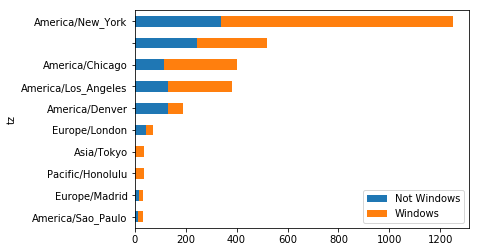

In [46]:
# 按Windows用户和非Windows用户统计的最常出现的时区
count_subset.plot(kind='barh', stacked=True) # stacked=True生成一张堆积条形图

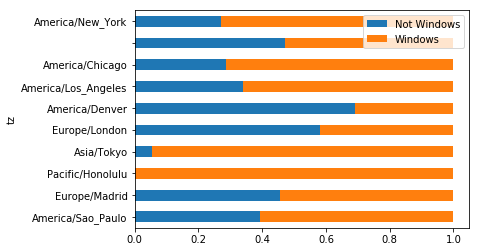

In [47]:
# 按Windows用户和非Windows用户比例统计的最常出现的时区
# 由于上图不太容易看清较小分组中Windows用户的相对比例 因此可以将各行规范为’总计为1‘并重新绘制
normed_subset = count_subset.div(count_subset.sum(1), axis=0) # div()除法 axis=1按列进行除
normed_subset.plot(kind='barh', stacked=True)

## MovieLens 1M数据集
### www.grouplens.org/node/73 采集了一组从20世纪90年代末到21世纪初由MovieLens用户提供的电影评分数据 这些数据主要包括电影评分、电影元数据（风格类型和年代）以及关于用户个人的人口统计学数据（年龄、邮编、性别、职业等）

### MovieLens 1M数据集含有来自6000多名用户对4000部电影的100万条评分数据 分为三个表 评分 用户信息 电影信息

In [48]:
# 首先 将该数据从zip文件中解压 通过pandas.read_table将各个表分别读到一个pandas DataFrame对象中 DAT文件
import pandas as pd
users = pd.read_table('movielens/users.dat')

In [49]:
users.head()

,1::F::1::10::48067
0,2::M::56::16::70072
1,3::M::25::15::55117
2,4::M::45::7::02460
3,5::M::25::20::55455
4,6::F::50::9::55117


In [50]:
# 查看数据 第一列是用户id 第二列是性别 第三列是年龄 第四列为职业 第五列是美国邮编 分隔符为:: 没有列头
# 因此设置 pd.read_table中的参数 sep= 分隔符 names=列名 header=头
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('movielens/users.dat', sep='::', header=None, names=unames)
users.head()

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [51]:
# 同理 加载电影的数据评分 电影元数据的数据集
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('movielens/ratings.dat', sep='::', header=None, names=rnames)
ratings.head()

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [52]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('movielens/movies.dat', sep='::', header=None, names=mnames)
movies.head()

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [53]:
# 分析散布在三个表中的数据不是件容易的事情 将三个表合并到一个表的话就变的简单了 使用pd.merge()函数
data = pd.merge(pd.merge(ratings, users), movies)
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [54]:
# 当使用数据合并遇到内存不够 memoryerror时 需要使用数据库进行操作
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
user_id       1000209 non-null int64
movie_id      1000209 non-null int64
rating        1000209 non-null int64
timestamp     1000209 non-null int64
gender        1000209 non-null object
age           1000209 non-null int64
occupation    1000209 non-null int64
zip           1000209 non-null object
title         1000209 non-null object
genres        1000209 non-null object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [55]:
data.ix[0]

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [56]:
# 为了按性别计算每部电影的平均得分，可以使用pandas提供的透视表功能 pivot_table()函数
mean_ratings = data.pivot_table('rating', index='title', 
                                columns='gender', aggfunc='mean')
# pivot_table()函数参数已经改变 rows变为index cols变为columns

In [57]:
mean_ratings.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [58]:
# 该操作产生了一个DataFrame 其内容为电影平均得分 行标为电影名称 列标为性别
# 现在打算过滤评分数据不够250条的电影 
# 为了达到这个目的 先对’title'进行分组 利用size()得到一个含有各电影分组大小的Series对象
ratings_by_title = data.groupby('title').size()

In [59]:
ratings_by_title.head() # size()函数用于计数

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [60]:
active_titles = ratings_by_title.index[ratings_by_title >= 250] # 使用行索引index将不足250条评论的电影剔除

In [61]:
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [62]:
mean_ratings = mean_ratings.ix[active_titles]

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [63]:
mean_ratings.head()

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421


In [68]:
# 为了解女性观众最喜欢的电影 我们可以对F列降序排列
top_female_ratings = mean_ratings.sort_index(by='F', ascending=False)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


In [70]:
# sort_index()函数排列行 参数by 依照什么列进行排序 ascending=False降序排列从大到小 按照什么顺序进行 
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [71]:
# 了解男性观众评分最高的电影
top_male_ratings = mean_ratings.sort_index(by='M', ascending=False)
top_male_ratings[:10]

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795


In [73]:
# 计算评分分歧 重新给数据加上一列差
mean_ratings['diff'] = mean_ratings['F'] - mean_ratings['M']

In [74]:
sort_by_diff = mean_ratings.sort_index(by='diff')

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [75]:
sort_by_diff[:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,-0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,-0.676359
Dumb & Dumber (1994),2.697987,3.336595,-0.638608
"Longest Day, The (1962)",3.411765,4.031447,-0.619682
"Cable Guy, The (1996)",2.250000,2.863787,-0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,-0.611985
"Hidden, The (1987)",3.137931,3.745098,-0.607167
Rocky III (1982),2.361702,2.943503,-0.581801
Caddyshack (1980),3.396135,3.969737,-0.573602


In [77]:
# 得出男性观众更喜欢的 电影
# 将其排序结果反序
sort_by_diff[::-1][:10] # 得出女性更加青睐的电影

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,0.676359
Grease (1978),3.975265,3.367041,0.608224
Little Women (1994),3.870588,3.321739,0.548849
Steel Magnolias (1989),3.901734,3.365957,0.535777
Anastasia (1997),3.800000,3.281609,0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,0.512885
"Color Purple, The (1985)",4.158192,3.659341,0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,0.487561


In [78]:
# 如果只是想要找到分歧最大的电影 可以计算得分数据的方差或者标准差
# 根据电影名称分组的得分数据的标准差
rating_std_by_title = data.groupby('title')['rating'].std()

In [80]:
# 再根据评价数进行过滤
rating_std_by_title = rating_std_by_title.ix[active_titles]

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


In [86]:
# 根据值对Series进行降序排列
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

## 1880-2010年间全美婴儿姓名

### 数据集包含名字 性别 出生 年份
#### 使用数据集你可以做很多事 例如：
#### 计算指定名字的年度比例 计算某个名字的相对排名 计算各年度最流行的名字 以及增长最快或减少最快的名字 分析名字趋势：元音 辅音 长度 总体多样性 拼写变化 收尾字母等 分析外源性趋势：圣经中的名字 名人 人口结构变化等

In [93]:
import pandas as pd
names1880 = pd.read_csv('babynames/yob1880.txt', names=['name',
                                                       'sex', 'births'])
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [94]:
names1880.info()
# 文件中有且仅有当年超过5次的名字
# 用birth列的sex分组小计表示该年度的births总计
names1880.groupby('sex').births.sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
name      2000 non-null object
sex       2000 non-null object
births    2000 non-null int64
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


sex
F     90993
M    110493
Name: births, dtype: int64

### 数据处理：由于该数据按年度被分隔成了多个文件 所以需要将其组装到第一个DataFrame中 并加上年份字段


In [101]:
# 2010是目前最后一个有效统计年度
years = range(1880, 2011)

pieces = [] # 先将其导入到一个列表中
columns = ['name', 'sex', 'births']

for year in years:
    path = 'babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    
    pieces.append(frame)
    
# 将所有数据整合到单个DataFrame中
# concat()函数是默认按行将多个DataFrame组合到一起 必须制定ignore_index=True 不保留原始的行号
names = pd.concat(pieces, ignore_index=True)
names.info() # 百万条数据 哇塞

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
name      1690784 non-null object
sex       1690784 non-null object
births    1690784 non-null int64
year      1690784 non-null int64
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


In [102]:
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [103]:
# 使用pandas中的透视表功能 pivot_table()函数 对year sex进行聚合
total_births = names.pivot_table('births', index='year',
                                columns='sex', aggfunc=sum)

In [105]:
total_births.tail() # tail 尾巴 最后五个 head()函数开头5个

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


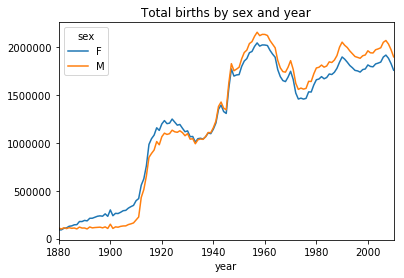

In [107]:
total_births.plot(title='Total births by sex and year') # plot()函数 线条 参数kind= 改变画图的 形式

In [108]:
# 下面我们来插入一个prop列，用于存放制定名字的婴儿数相对于总出生数的比例
def add_prop(group):
    # 整数除法会向下圆整，因此需要改变格式
    births = group.births.astype(float)
    
    group['prop'] = births / births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 5 columns):
name      1690784 non-null object
sex       1690784 non-null object
births    1690784 non-null int64
year      1690784 non-null int64
prop      1690784 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 64.5+ MB


In [109]:
# 执行这样的分组处理时 需要做一些有效性检查 比如验证所有分组的prop的总和是否为1 
# 由于这是一个浮点型数据 所以我们应该用np.allclose来检查这个总计值是否足够近似于1
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [113]:
# 为了实现更进一步的分析 需要取出该数据的一个子集 每对sex/year组合的前1000个名字
def get_top1000(group):
    return group.sort_index(by='births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


In [114]:
top1000.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 261877 entries, (1880, F, 0) to (2010, M, 1677645)
Data columns (total 5 columns):
name      261877 non-null object
sex       261877 non-null object
births    261877 non-null int64
year      261877 non-null int64
prop      261877 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 13.7+ MB


### 分析命名趋势

In [115]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [118]:
boys.info()
girls.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 130997 entries, (1880, M, 942) to (2010, M, 1677645)
Data columns (total 5 columns):
name      130997 non-null object
sex       130997 non-null object
births    130997 non-null int64
year      130997 non-null int64
prop      130997 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 7.9+ MB
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 130880 entries, (1880, F, 0) to (2010, F, 1657946)
Data columns (total 5 columns):
name      130880 non-null object
sex       130880 non-null object
births    130880 non-null int64
year      130880 non-null int64
prop      130880 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 7.9+ MB


In [119]:
# 先生成一张按year name统计的总出生数透视表
total_births = top1000.pivot_table('births', index='year',
                                  columns='name', aggfunc=sum)

C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:135: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


In [124]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000095716ABB00>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000957799FE48>], dtype=object)

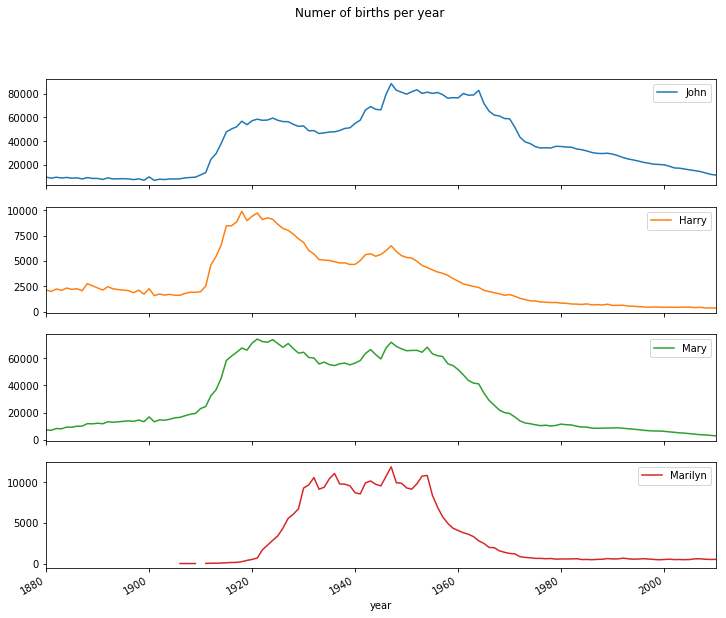

In [125]:
# 现在使用DataFrame的plot方法绘制几个名字的曲线图
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

subset.plot(subplots=True, figsize=(12, 10), grid=False,
           title='Numer of births per year')

### 评估命名多样性的增长

C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:135: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)
C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:135: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


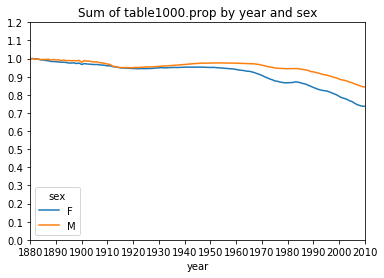

In [126]:
# 上图所反映的情况意味着父母愿意给小孩起常见的名字越来越少 验证办法为计算最流行的1000个名字所占的比例
table = top1000.pivot_table('prop', index='year',
                           columns='sex', aggfunc=sum)

table.plot(title='Sum of table1000.prop by year and sex',
          yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [131]:
# 从图中看出 名字的多样性确实出现了增长
# 另一个办法是计算占总出生人数前50%的不同名字的数量 不太好统计 这里先只考虑2010年男孩的名字
df = boys[boys.year == 2010]
df.head()

name sex  births  year      prop
year sex                                             
2010 M   1676644    Jacob   M   21875  2010  0.011523
         1676645    Ethan   M   17866  2010  0.009411
         1676646  Michael   M   17133  2010  0.009025
         1676647   Jayden   M   17030  2010  0.008971
         1676648  William   M   16870  2010  0.008887

In [145]:
# 要点在于多少个名字的人数加起来才够50%
# 因此：先将prop降序排序 计算prop的累计cumsum
prop_cumsum = df.sort_index(by='prop', ascending=False).prop.cumsum()

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


In [147]:
prop_cumsum.head()

year  sex         
2010  M    1676644    0.011523
           1676645    0.020934
           1676646    0.029959
           1676647    0.038930
           1676648    0.047817
Name: prop, dtype: float64

In [149]:
# 再通过searchsorted()方法找出0.5应该在哪个位置 从0开始索引加1
prop_cumsum.searchsorted(0.5) + 1

array([117], dtype=int64)

In [154]:
# 同理 查看1900年的数据
df = boys[boys.year == 1900]
in1900 = df.sort_index(by='prop', ascending=False).prop.cumsum()
in1900.searchsorted(0.5) + 1 # 返回的是array类型 非数字型数据 因此需要索引出来

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


array([25], dtype=int64)

In [165]:
# 设置函数对所有year/sex组合执行这个计算
def get_quantile_count(group, q=0.5):
    group = group.sort_index(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q)[0] + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex') # unstack()拆分 按性别拆分

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


In [166]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


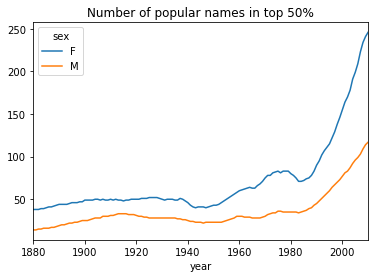

In [170]:
diversity.plot(title='Number of popular names in top 50%')
# 按年度统计的密度表

### ‘最后一个字母’的变革

In [171]:
# 2007年， 一名婴儿姓名研究人员在自己网站指出：近百年来，男孩名字在最后一个字母上的分布发生了显著的变化
# 数据维度：年度 性别 姓名末字母
# 从name列取出最后一个字母
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters,
                         columns=['sex', 'year'], aggfunc=sum)

In [172]:
# 然后选出具有一定代表性的三年 reindex()函数是重排序索引和指定索引
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [173]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [174]:
letter_prop = subtable / subtable.sum().astype(float)

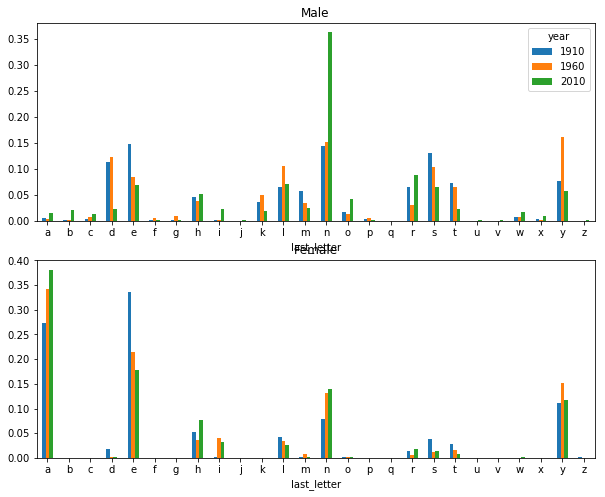

In [177]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)

In [182]:
# 从上图可以看出 以字母‘n'结尾的男孩名字出现了显著的增长 
# 回到之前创建的完整表按年度 性别对其规范化处理 在男孩名字中选取几个字母 最后进行转置 做成一个时间序列
letter_prop = table / table.sum().astype(float)

dny_ts = letter_prop.ix[['d', 'n', 'y'], 'M'].T # .T进行转置

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """


In [184]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


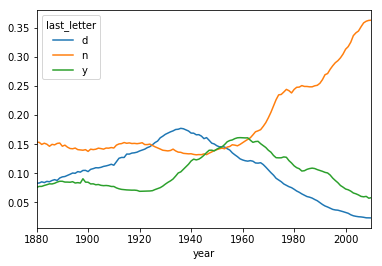

In [185]:
dny_ts.plot()

### 另一个有趣的趋势是：名字流行’变性‘了

In [187]:
# 早年流行与男孩的名字近年来变性了 女性反而更多了
all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]

In [188]:
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [189]:
# 利用结果过滤其他名字 并按名字分组计算出生数以查看相对频率
filtered = top1000[top1000.name.isin(lesley_like)]

In [190]:
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [192]:
# 接下来按性别和年度进行聚合 并按年度进行规范化处理
table = filtered.pivot_table('births', index='year', 
                            columns='sex', aggfunc=sum)
table = table.div(table.sum(1), axis=0)

C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:135: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)
C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:135: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


In [194]:
table.head()

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857


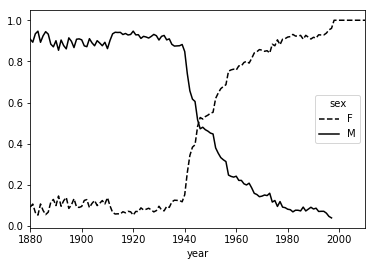

In [195]:
table.plot(style={'M': 'k-', 'F': 'k--'})